Best parameters for the model: {'linearregression__fit_intercept': False, 'linearregression__n_jobs': None, 'linearregression__positive': False, 'polynomialfeatures__degree': 4}


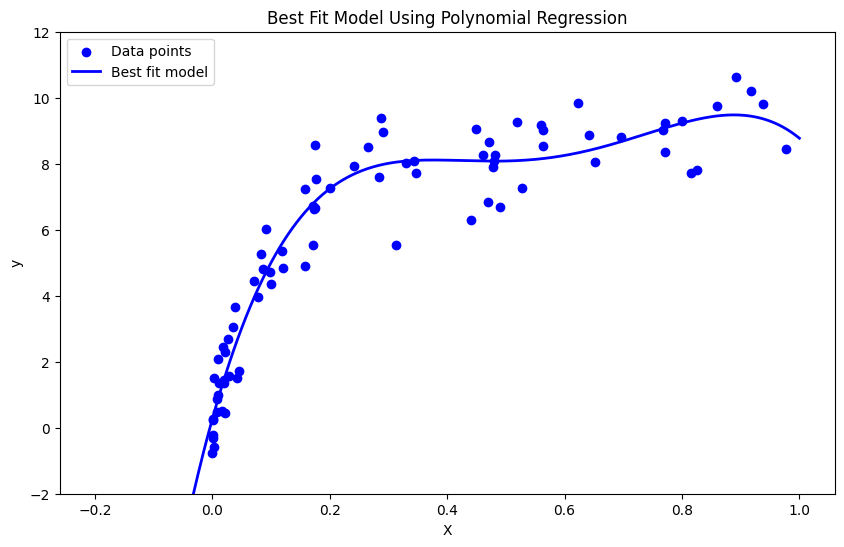

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Define PolynomialRegression as a pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# Function to generate synthetic data
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

# Generate data with 80 points
X, y = make_data(80)

# Define the parameter grid with additional parameters
param_grid = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept': [True, False],
    'linearregression__positive': [True, False],
    'linearregression__n_jobs': [None, 1, -1]
}

# Run GridSearchCV to find the best parameters
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)

# Get the best model parameters
best_params = grid.best_params_
print("Best parameters for the model:", best_params)

# Re-fit the model using the best parameters
best_model = grid.best_estimator_

# Generate test points for a smooth curve
X_test = np.linspace(-0.2, 1.0, 500).reshape(-1, 1)
y_test = best_model.predict(X_test)

# Plot the data and the best model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X_test, y_test, color='blue', linewidth=2, label="Best fit model")
plt.ylim(-2, 12)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Best Fit Model Using Polynomial Regression")
plt.legend()
plt.show()
